# Google Drive をマウントする

In [1]:
# 必要なライブラリを読み込む
from google.colab import drive 

# Google ドライブをマウントする
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 必要なライブラリをインポート

In [2]:
# pandas のインポート
import pandas as pd

# 機械学習用ライブラリ sklearn（scikit-learn）の decomposition ライブラリから
# 主成分分析用クラス FactorAnalysis をインポート 
from sklearn.decomposition import PCA

# 機械学習用ライブラリ sklearn（scikit-learn）内にあるライブラリ preprocessing から
# 標準化用クラス StandardScaler をインポート 
from sklearn.preprocessing import StandardScaler

# グラフ描画用ライブラリ matplotlib、seaborn をインポート
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# データの読み込み

In [3]:
# ビール試飲アンケート調査のデータを読み込む
BeerResearch = pd.read_csv("drive/My Drive/DATA-SCI-TECH-EXERCISE/DATA/BeerResearch.csv")
BeerResearch.head()

,TesterID,Beer,Color,Aroma,Bubbles,Taste,Flavor,Strength,Price
0,T0001,Cビール,3,3,5,4,3,0,160
1,T0002,Aビール,5,3,5,3,1,1,300
2,T0003,Bビール,3,3,2,5,5,1,330
3,T0004,Bビール,1,3,2,5,5,0,330
4,T0005,Cビール,3,3,5,4,3,0,230


In [4]:
BeerResearch.describe()

,Color,Aroma,Bubbles,Taste,Flavor,Strength,Price
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,3.135593,3.127119,4.059322,3.673729,3.093220,0.491525,243.262712
std,1.144201,1.091917,1.483483,1.031168,1.213311,0.500991,51.438363
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,150.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,200.000000
50%,3.000000,3.000000,5.000000,4.000000,3.000000,0.000000,230.000000
75%,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,300.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,330.000000


In [5]:
BeerResearch.groupby("Beer").mean()

,Color,Aroma,Bubbles,Taste,Flavor,Strength,Price
Beer,,,,,,,
Aビール,4.773585,4.622642,4.773585,2.584906,2.584906,0.867925,273.018868
Bビール,2.629630,2.703704,1.629630,4.703704,4.814815,0.777778,307.407407
Cビール,2.674419,2.689922,4.782946,3.689922,2.581395,0.217054,204.186047


# 標準化の実施

In [6]:
# 変数リストを作っておく
columnList = ["Color","Aroma","Bubbles","Taste","Flavor","Strength"]
X = BeerResearch.loc[:,columnList]

# X のデータを使い標準化パラメータを獲得してから、X に対して標準化を実施
scaler_X = StandardScaler()
scaler_X.fit( X )
X_std = pd.DataFrame(scaler_X.transform(X), columns=columnList)

# 主成分分析を実施する

In [7]:
# 主成分分析用クラスのインスタンスを生成する
pca_X = PCA()

# 主成分分析を実行する
pca_X.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# 固有値を表示する
pca_X_explained_variance = pd.DataFrame( pca_X.explained_variance_ , columns=["ExplainedVariance"])
pca_X_explained_variance

,ExplainedVariance
0,2.534046
1,1.696444
2,0.596003
3,0.487261
4,0.431242
5,0.280536


In [9]:
# 固有ベクトル（主成分）を表示する
pca_X_components = pd.DataFrame(pca_X.components_, columns=columnList)
pca_X_components

,Color,Aroma,Bubbles,Taste,Flavor,Strength
0,-0.432940,-0.408850,-0.460233,0.502175,0.424274,-0.037446
1,-0.364233,-0.386726,0.408747,0.030802,-0.392903,-0.628794
2,-0.276510,0.002637,0.159203,0.429663,-0.559627,0.632769
3,0.090549,-0.761297,0.030351,-0.503352,0.022494,0.396785
4,-0.762715,0.320223,-0.104503,-0.537073,0.062462,0.111591
5,0.116217,-0.034100,-0.764149,-0.143002,-0.589940,-0.181462


In [10]:
# 寄与率・累積寄与率を表示する
i = 0
cumCR = 0
CRList = []
for CR in pca_X.explained_variance_ratio_:
  cumCR = cumCR + CR
  CRList.append([CR,cumCR])
  i = i + 1

pca_X_contRate = pd.DataFrame(CRList,columns=["ContributionRate","CumulativeContributionRate"])
pca_X_contRate

,ContributionRate,CumulativeContributionRate
0,0.420551,0.420551
1,0.281543,0.702094
2,0.098913,0.801007
3,0.080866,0.881873
4,0.071569,0.953442
5,0.046558,1.000000


In [11]:
# 主成分得点を計算する
feature = pd.DataFrame( pca_X.transform(X) )
feature.head()

,0,1,2,3,4,5
0,-1.545012,-1.264642,0.014172,-3.806414,-3.810900,-5.916221
1,-3.799060,-1.866898,0.783513,-2.770168,-4.812591,-4.542366
2,1.148964,-3.874682,-0.520260,-3.959048,-3.797948,-5.128117
3,2.052290,-2.517422,-0.600011,-4.536930,-2.384109,-5.179090
4,-1.545012,-1.264642,0.014172,-3.806414,-3.810900,-5.916221


# 内容の確認を行う

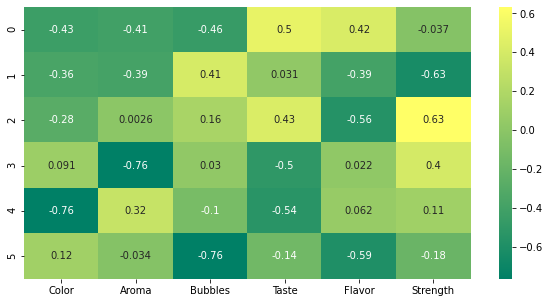

In [12]:
# 固有ベクトルをヒートマップにしておく
plt.figure(figsize=(10, 5))
sns.heatmap( pca_X_components, annot=True, cmap="summer" )

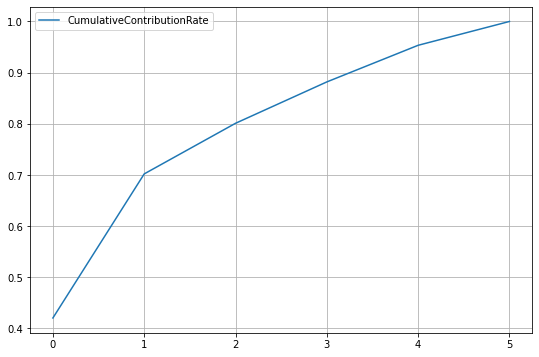

In [13]:
# 累積寄与率を折れ線グラフにして確認する
pca_X_contRate["CumulativeContributionRate"].plot(figsize=(9,6), legend='best', grid=True )

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12499 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text

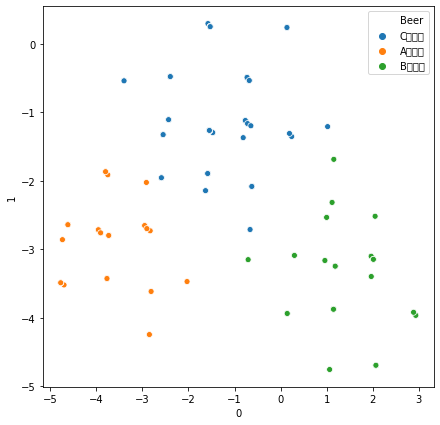

In [14]:
# 第１主成分（0）・第２主成分（1）でプロットを行う。（ビールで色分け）
# （日本語フォントの関係で警告が発生するが一旦、気にしない。）
feature["Beer"] = BeerResearch["Beer"]
plt.figure(figsize=(7, 7))
sns.scatterplot(0,1,data=feature,hue="Beer")

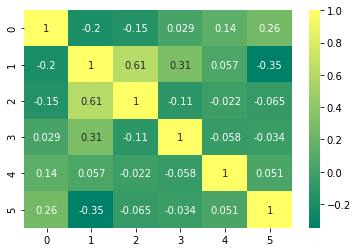

In [15]:
# 主成分得点にした後の各変数の相関係数を確認する
# （必ずしもそうでない場合もあるが、基本的には元データよりも相関が薄くなる）
sns.heatmap(feature.corr(),annot=True,cmap="summer")

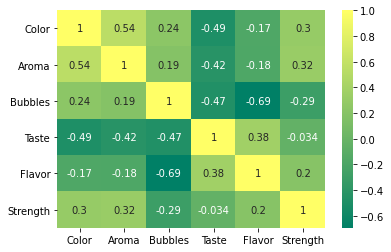

In [16]:
# 元データの各変数の相関係数を確認する
sns.heatmap(X.corr(),annot=True,cmap="summer")